In [ ]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go



In [ ]:
df = pd.read_csv("/content/Startups.csv", encoding='latin-1')
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
df = pd.DataFrame(df)
df.rename(columns = {'Date Joined' : 'Date'}, inplace = True)
df.rename(columns = {'Valuation ($B)' : 'Valuation'}, inplace = True)
df.rename(columns = {'Select Investors' : 'Investors'}, inplace = True)
df['Investors'] = df['Investors'].to_string()

date = df.Date.str.split('/', expand =True)
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]

df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

df['Valuation']=df['Valuation'].str.replace('$', '')
df.Valuation = pd.to_numeric(df.Valuation)
df.year = pd.to_numeric(df.year)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
df.head(15)

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,...,NoBroker,Slice,Thought Machine,Lessen,Clara,YipitData,Anyscale,Iodine Software,ReliaQuest,Pet Circle
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
9,9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus


In [ ]:
fig = px.pie(df, names='Industry')
fig.show()


In [ ]:
India = df[df["Country"] == "India"]
India

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
12,12,BYJU's,21.00,7/25/2017,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2017,25,7
53,53,OYO Rooms,9.60,9/25/2018,India,Gurugram,Travel,"0 Sequoia Capital China, SIG Asia Investm...",2018,25,9
62,62,Dream11,8.00,4/9/2019,India,Mumbai,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2019,9,4
80,80,National Stock Exchange of India,6.50,7/1/2020,India,Mumbai,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2020,1,7
83,83,Ola Cabs,7.50,10/27/2014,India,Bengaluru,Auto & transportation,"0 Sequoia Capital China, SIG Asia Investm...",2014,27,10
115,115,Swiggy,5.50,6/21/2018,India,Bengaluru,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2018,21,6
126,126,Meesho,4.90,4/5/2021,India,Bengaluru,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,5,4
153,153,CRED,4.01,4/6/2021,India,Bengaluru,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,4
193,193,Digit Insurance,3.50,1/15/2021,India,Bengaluru,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,15,1
199,199,Unacademy,3.44,9/2/2020,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2020,2,9


In [ ]:
fig3 = px.line(df, x="Company", y="year", title='Year Wise Company Joined')
fig3.show()

In [ ]:
company_wise_valuation = df.sort_values(by="Valuation",ascending = False)
company_wise_valuation.head(10)

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


In [ ]:
Date_wise = df.sort_values(by="Date",ascending = True)
Date_wise.head(10)


,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
710,710,LinkSure Network,1.00,1/1/2015,China,Shanghai,Mobile & telecommunications,"0 Sequoia Capital China, SIG Asia Investm...",2015,1,1
642,642,L&P Cosmetic,1.19,1/1/2016,South Korea,Seoul,Consumer & retail,"0 Sequoia Capital China, SIG Asia Investm...",2016,1,1
226,226,Traveloka,3.00,1/1/2017,Indonesia,Jakarta,Travel,"0 Sequoia Capital China, SIG Asia Investm...",2017,1,1
47,47,N26,9.23,1/10/2019,Germany,Berlin,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2019,10,1
600,600,EQRx,1.23,1/11/2021,United States,Cambridge,Health,"0 Sequoia Capital China, SIG Asia Investm...",2021,11,1
101,101,Workato,5.70,1/12/2021,United States,Mountain View,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,12,1
336,336,Cockroach Labs,2.16,1/12/2021,United States,New York,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2021,12,1
418,418,MX Technologies,1.90,1/13/2021,United States,Lehi,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,13,1
341,341,Webflow,2.10,1/13/2021,United States,San Francisco,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,13,1
647,647,Yimidida,1.17,1/14/2019,China,Shanghai,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2019,14,1


In [ ]:
df[df["City"] == "Mumbai"]

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,...,NoBroker,Slice,Thought Machine,Lessen,Clara,YipitData,Anyscale,Iodine Software,ReliaQuest,Pet Circle
62,62,Dream11,8.0,4/9/2019,India,Mumbai,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2019,9,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
80,80,National Stock Exchange of India,6.5,7/1/2020,India,Mumbai,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2020,1,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
215,215,Eruditus Executive Education,3.2,8/12/2021,India,Mumbai,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2021,12,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
631,631,UpGrad,1.2,8/9/2021,India,Mumbai,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2021,9,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
638,638,MyGlamm,1.2,11/10/2021,India,Mumbai,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2021,10,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus


In [ ]:
x = df.groupby("City").sum().sort_values(by="Valuation",ascending = False).head(20)
x = x.reset_index()
px.bar(x = "City",y = "Valuation",data_frame=x)

In [ ]:
df.City.value_counts().head(15)

San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
Bengaluru         25
Shenzhen          18
Berlin            16
Paris             15
Chicago           14
Hangzhou          14
Boston            14
Tel Aviv          13
Mountain View     13
Palo Alto         11
Name: City, dtype: int64

In [ ]:
df[df["City"] == "Bangalore"]

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,...,NoBroker,Slice,Thought Machine,Lessen,Clara,YipitData,Anyscale,Iodine Software,ReliaQuest,Pet Circle
420,420,CoinSwitch Kuber,1.9,10/6/2021,India,Bangalore,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus


In [ ]:
df[df.City == "Bengaluru"]['Company']

12                     BYJU's
83                   Ola Cabs
115                    Swiggy
126                    Meesho
153                      CRED
193           Digit Insurance
199                 Unacademy
221                     Udaan
236                  Razorpay
245                 ShareChat
252     Ola Electric Mobility
257                     Groww
299     Mobile Premier League
523                   CureFit
683                      apna
686    Acko General Insurance
709                    InMobi
794                 DailyHunt
871                 BlackBuck
880                   Zetwerk
898                   Vedantu
901                   Licious
920              Mensa Brands
926                  NoBroker
927                     Slice
Name: Company, dtype: object

In [ ]:
df[df.Country == "India"][["Company","Valuation","Industry","year"]]  

,Company,Valuation,Industry,year
12,BYJU's,21.00,Edtech,2017
53,OYO Rooms,9.60,Travel,2018
62,Dream11,8.00,Internet software & services,2019
80,National Stock Exchange of India,6.50,Fintech,2020
83,Ola Cabs,7.50,Auto & transportation,2014
115,Swiggy,5.50,"Supply chain, logistics, & delivery",2018
126,Meesho,4.90,Internet software & services,2021
153,CRED,4.01,Fintech,2021
193,Digit Insurance,3.50,Fintech,2021
199,Unacademy,3.44,Edtech,2020


In [ ]:
df[df.Industry == "Edtech"]

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,...,NoBroker,Slice,Thought Machine,Lessen,Clara,YipitData,Anyscale,Iodine Software,ReliaQuest,Pet Circle
12,12,BYJU's,21.00,7/25/2017,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2017,25,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
16,16,Yuanfudao,15.50,5/31/2017,China,Beijing,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2017,31,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
136,136,VIPKid,4.50,8/4/2016,China,Beijing,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2016,4,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
178,178,Articulate,3.75,7/1/2021,United States,New York,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
199,199,Unacademy,3.44,9/2/2020,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2020,2,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
215,215,Eruditus Executive Education,3.20,8/12/2021,India,Mumbai,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2021,12,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
230,230,Zuoyebang,3.00,7/18/2018,China,Beijing,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2018,18,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
235,235,ApplyBoard,3.00,5/5/2020,Canada,Kitchener,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2020,5,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
243,243,Age of Learning,3.00,5/3/2016,United States,Glendale,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2016,3,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus
255,255,Outschool,3.00,4/14/2021,United States,San Francisco,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2021,14,...,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus,Byjus


In [ ]:
df[df.Country == "India"][df[df.Country == "India"].Industry == "Fintech"]['Company']

80     National Stock Exchange of India
153                                CRED
193                     Digit Insurance
234                           Pine Labs
236                            Razorpay
257                               Groww
266                            BharatPe
304                        PolicyBazaar
420                    CoinSwitch Kuber
681                             CoinDCX
686              Acko General Insurance
927                               Slice
Name: Company, dtype: object

In [ ]:
y = df.groupby("Country").sum().sort_values(by = "Valuation",ascending = False).head(20)
y = y.reset_index()
px.bar(x="Country",y = "Valuation",data_frame = y)

In [ ]:
valuation_wise = px.line(df,x = "Company",y = "Valuation")
valuation_wise.show()

In [ ]:
valuation_wise = px.line(India,x = "Company",y = "Valuation")
valuation_wise.show()

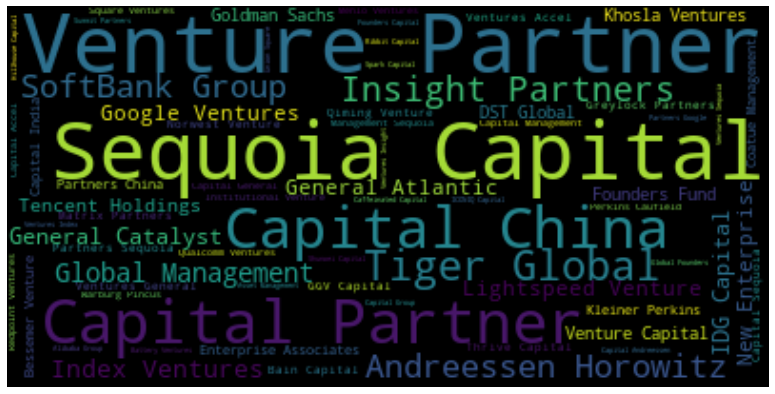

In [ ]:
from wordcloud import WordCloud
wordCloud = WordCloud().generate(" ".join(df.Investors))
plt.figure(figsize = (15,7))
plt.axis("off")
plt.imshow(wordCloud,interpolation = "bilinear")
plt.show()

In [ ]:
total_En_St = df.groupby('Company').sum().sort_values("Valuation",ascending = False).head(20)
total_En_St = total_En_St.reset_index()
px.bar(x = "Company",y = "Valuation",data_frame=total_En_St)

In [ ]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}


In [ ]:
from collections import Counter

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

def geoplot(ddf):
  country_with_code, country = {}, {}
  shows_countries = ", ".join(ddf['Country'].dropna()).split(", ")
  for c,v in dict(Counter(shows_countries)).items():
    code = ""
    if c.lower() in country_codes:
      code = country_codes[c.lower()]
      country_with_code[code] = v
      country[c] = v

  data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]
  layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )
  
  fig = dict( data=data, layout=layout )
  iplot( fig, validate=False, filename='d3-world-map' )
  return country




country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y = labels,x = values,orientation = "h",name = "",marker = dict(color ="#a678de"))

data = [trace1]
layout = go.Layout(title = "Countries with most content",height = 700,legend = dict(x=0.1,y=1.1,orientation = "h"))
fig = go.Figure(data,layout = layout)
fig.show()